# Các nội dung chính
1. Mục tiêu:
*   Nắm được các bước cơ bản trong khâu tiền xử lí dữ liệu.


2. Dữ liệu: 
* Dữ liệu bất động sản - *Bengaluru_House_Data*
> Gồm các trường dữ liệu: location, size, total_sqft, price, ...


> Link Kaggle: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data




3. Yêu cầu:
* Sử dụng các công cụ (Pandas, Seaborn, ...) để thực hiện xem xét, đánh giá đặc điểm của dữ liệu, từ đó đưa ra phương án tiền xử lí dữ liệu (làm sạch, trích xuất thông tin ban đầu, ...)




# Nội dung thực hành

In [1]:
#Nếu chạy trên Google Colab thì cần kết nối với máy chủ trước
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### Import Libraries

In [2]:
import numpy as np
import pandas as pd #Giúp làm việc với các dữ liệu dạng bảng
import matplotlib.pyplot as plt #Thư viện hỗ trợ trực quan hóa dữ liệu
import seaborn as sns #Thư viện giúp trực quan hóa dữ liệu, được xây trên matplotlib

### Load dataset 

1. Đọc dữ liệu bằng pandas, dạng dataframe

In [3]:
%cd /content/drive/MyDrive/Preprocessing_practice/1.Practice/Bangalore_House_Price_data
# Nếu chạy trên colab thì cũng cần trỏ tới thư mục phù hợp để lấy data
# cd DIR_PATH

[Errno 2] No such file or directory: '/content/drive/MyDrive/Preprocessing_practice/1.Practice/Bangalore_House_Price_data'
/home/kh0ngm1nh/Desktop/AI/CTAI-ML/ML-exercises/Ex2


In [4]:
path = "Bangalore_House_Price_data/Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

2. Review 5 sample đầu tiên

In [5]:
df_raw.head() # return DataFrame

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


3. Review 5 sample cuối cùng

In [6]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### Exploratory Data Analysis (EDA)

In [7]:
df = df_raw.copy() #Tạo bản sao để thực hiện EDA

1. Thông tin cơ bản về dữ liệu, tên trường, số giá trị non-null của từng trường, kiểu dữ liệu của từng trường

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


2. Thống kê 1 số thuộc tính cơ bản của dữ liệu, bao gồm count, mean, std, min, max, quartile

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


3. Thống kê các giá trị duy nhất của từng trường và số lần xuất hiện của chúng

In [10]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

4. Xem xét tương quan về giá trị của các cặp trường số

/home/kh0ngm1nh/miniconda3/envs/test1/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


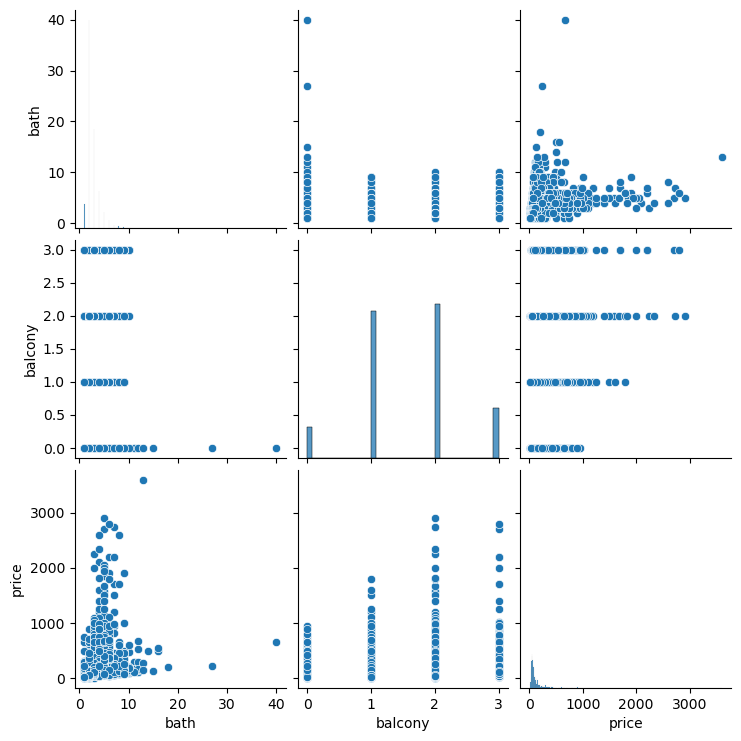

In [11]:
sns.pairplot(df)

<Axes: >

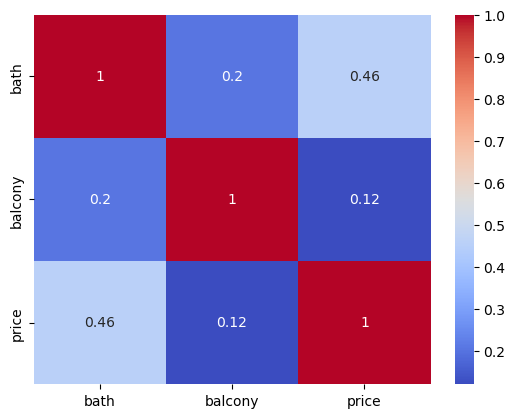

In [12]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

<Axes: >

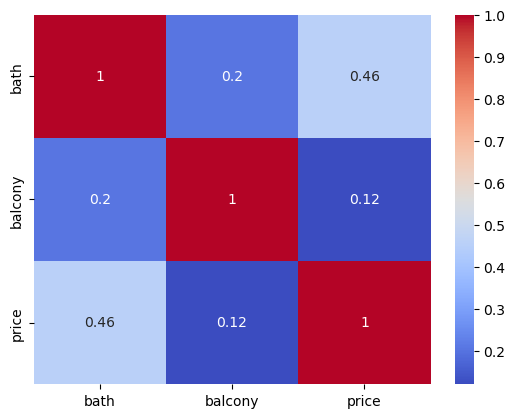

In [13]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

### Preare Data for Machine Learning Model

#### Data cleaning

1. Thống kê số lượng và tỉ lệ giá trị null của từng thuộc tính

In [14]:
df.isnull().sum() #So luong gia tri null cua tung thuoc tinh

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
df.isnull().mean()*100  # Tỷ lệ giá trị null của từng thuộc tính

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

2. Loại đi trường society vì tỉ lệ null cao (41%)

In [16]:
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

3. Thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

In [17]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

4. Xóa đi các điểm dữ liệu (hàng) có giá trị nan (không có giá trị)

In [18]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [19]:
df3.isnull().sum() #Thống kê lại xem đã xử lí hết các dữ liệu null hay chưa?

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

#### Feature Engineering

In [20]:
#Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

1. Converting 'total_sqft' cat feature in numeric

In [21]:
df3['total_sqft'].value_counts()

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225          

2. Chuyển trường total_sqft thành kiểu float

In [22]:
total_sqft_float = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_float.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_float.append((float(temp[0])+float(temp[-1]))/2) 
    except:
      total_sqft_float.append(np.nan)

In [23]:
df4 = df3.reset_index(drop=True)

3. Thêm trường total_sqft kiểu float

In [24]:
df5 = df4.join(pd.DataFrame({'total_sqft_float':total_sqft_float}))
df5.head() #Quan sát kết quả sau khi xử lí

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


6. Thông tin về số điểm dữ liệu null của từng trường

In [25]:
df5.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64

7. Bỏ đi các điểm dữ liệu (hàng) có giá trị null

In [26]:
df6 = df5.dropna()
df6.shape

(13200, 9)

8. Xem lại thông tin của dataframe 

In [27]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


9. Làm việc với feature: *size*

In [28]:
# Quan sát sự phân bố giá trị của trường 'size' với value_counts
df6['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [29]:
#Chuyển thuộc tính số phòng từ dạng category về dạng numeric
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [30]:
#Đánh lại index cho các hàng theo dãy số tự nhiên liên tiếp
df6 = df6.reset_index(drop=True) 

In [31]:
# Thêm trường dữ liệu số phòng (bhk)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [32]:
#In ra kết quả thực hiện các thao tác kể trên?
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


10. Finding Outlier and Removing
* Dựa trên biểu đồ boxplot vừa thực hiện ở trên/ hoặc công cụ khác để phát hiện và loại bỏ các điểm ngoại lai:

<Axes: xlabel='total_sqft_float'>

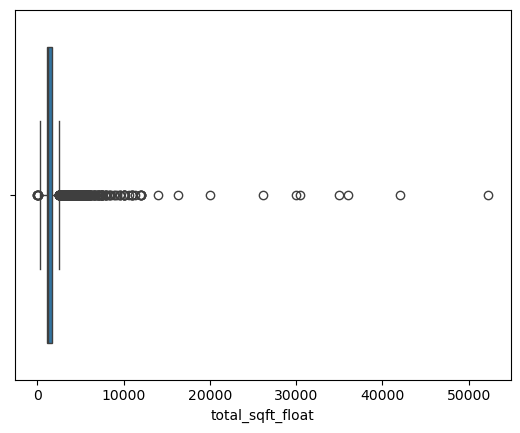

In [33]:
# Xem xét trường diện tích:
sns.boxplot(x = df7['total_sqft_float'])

In [34]:
# Chọn ngưỡng diện tích là 350 để xem xét
df7[df7['total_sqft_float']/df7['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [35]:
# Loại bỏ đi các điểm dữ liệu có diện tích phòng trung bình < 350
df8 = df7[~(df7['total_sqft_float']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [86]:
# Tạo thêm trường dữ liệu price_per_sqft (giá/ diện tích feet vuông)
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_float']  
df8.head()

/tmp/ipykernel_6431/1462017459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_float']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [37]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

# Bài tập bổ sung (homework)

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

/tmp/ipykernel_6431/4192387526.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_6431/4192387526.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_6431/4192387526.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_6431/4192387526.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_6431/4192387526.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


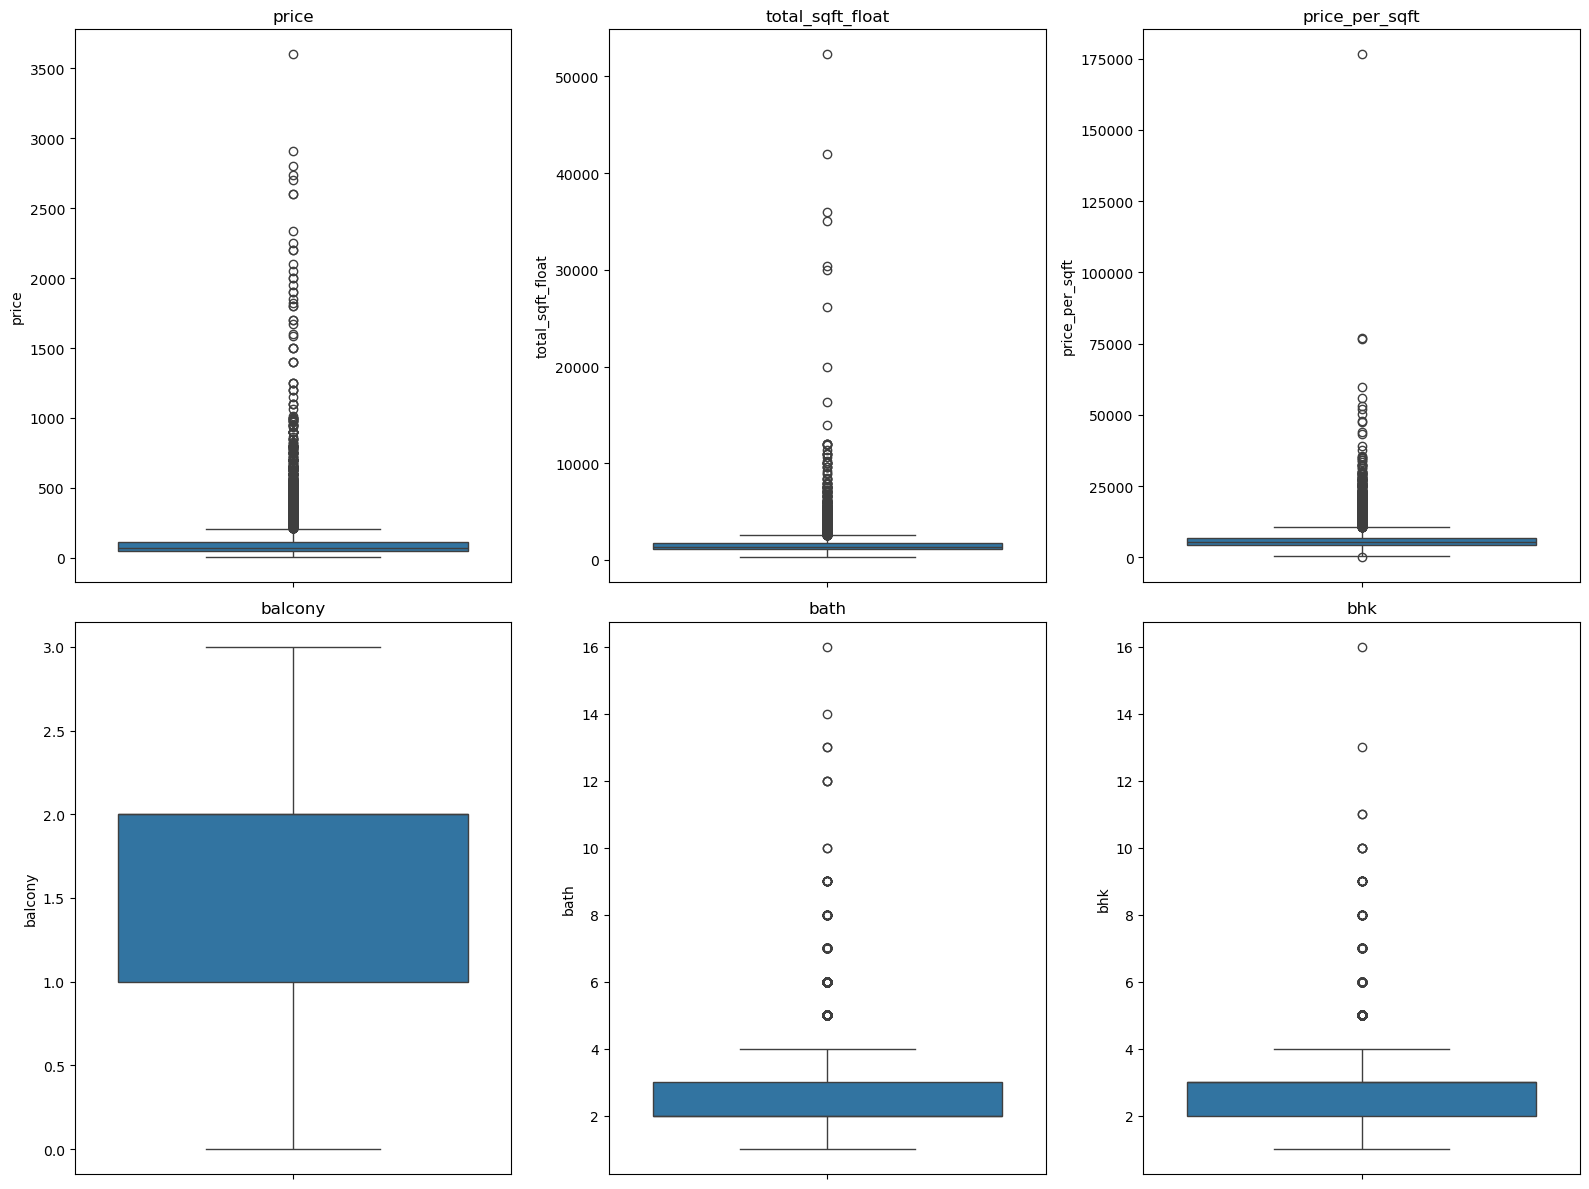

In [87]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu và phát hiện ngoại lai của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))

for i, field in enumerate(vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df8[field])
    plt.title(field)
    plt.tight_layout()

#Code ở đây

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [88]:
def remove_pps_outliers(df):
  #Code ở đây
    ans = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        op_df = subdf[(subdf.price_per_sqft >= m - std) & (subdf.price_per_sqft <= m + std)]
        ans = pd.concat([ans, op_df], ignore_index = True)
    return ans
        
#--------
df9 = remove_pps_outliers(df8)
df9.shape

(9421, 11)

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. Cần ghi rõ quy tắc ghi nhận outlier

In [89]:
def remove_bhk_outliers(df):
    # Code ở đây
    ans = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        for key2, ssubdf in subdf.groupby('bhk'):
            m = np.mean(ssubdf.price_per_sqft)
            std = np.std(ssubdf.price_per_sqft)
            op_df = ssubdf[(ssubdf.price_per_sqft >= m - std) & (ssubdf.price_per_sqft <= m + std)]
            ans = pd.concat([ans, op_df], ignore_index = True)
    return ans


df10 = remove_bhk_outliers(df9)
df10.shape

(6682, 11)

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [42]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 12!!!)

array([ 1.,  3.,  2.,  9., 12.,  4., 13.,  5.,  8.,  6.,  7., 16.])

In [90]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
1430,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
4353,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
5341,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
5702,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [92]:
df11 = df10[~(df10.bath > df10.bhk+2)]
df11.shape

(6678, 11)

In [93]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Built-up Area,Ready To Move,Anekal,1 RK,351,1.0,1.0,16.0,351.0,1,4558.404558
1,Super built-up Area,Ready To Move,Banaswadi,1 RK,527,1.0,0.0,35.0,527.0,1,6641.366224
2,Super built-up Area,Ready To Move,Basavangudi,1 RK,670,1.0,1.0,50.0,670.0,1,7462.686567
3,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
4,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571


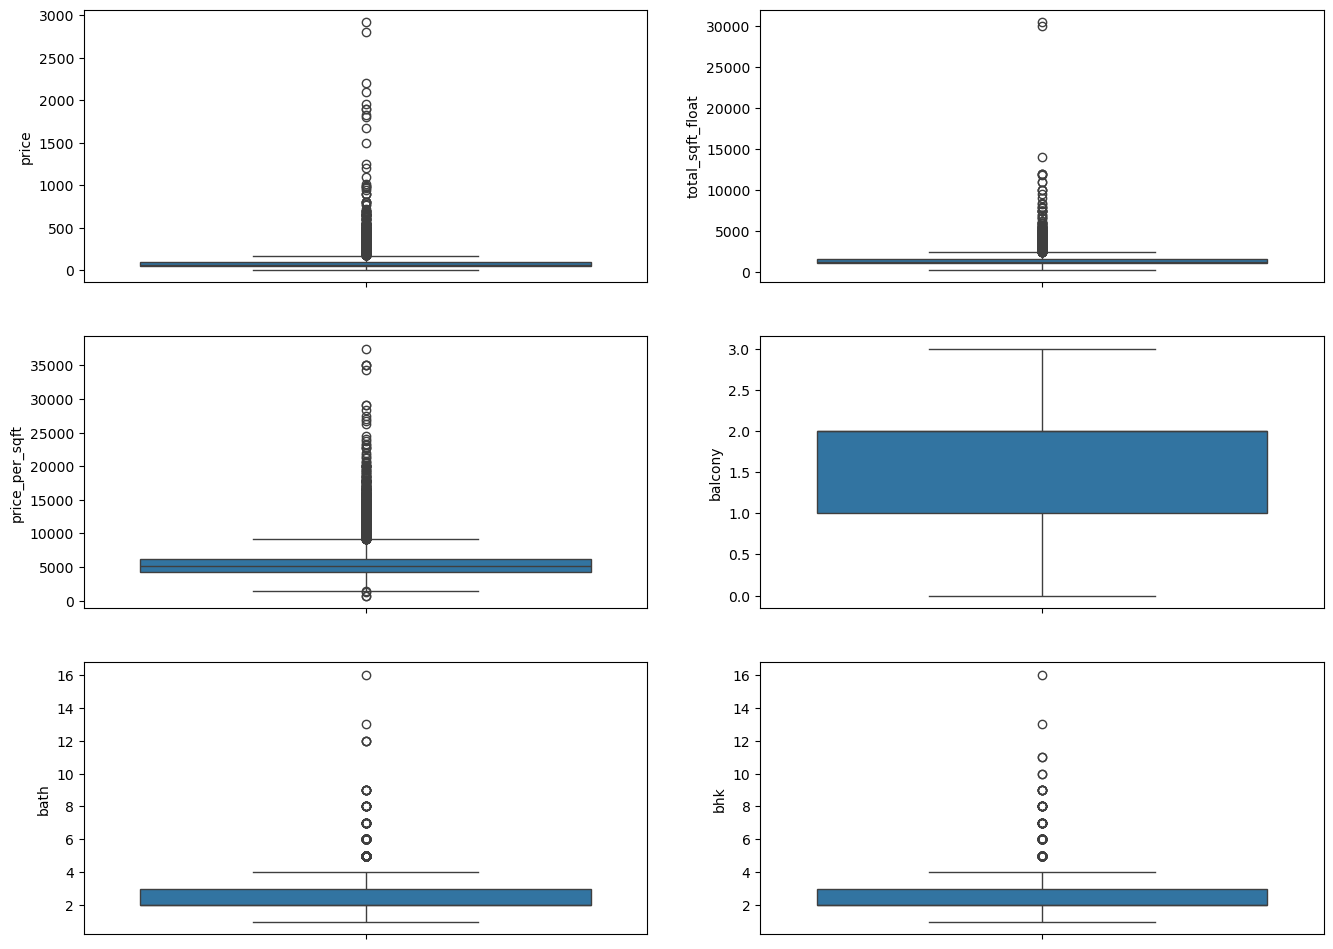

In [94]:
# Quan sát lại kết quả sau khi xử lí với boxplot

# (Dùng lại hàm đã code bên trên)
plt.figure(figsize=(16,12))
for i,var in enumerate(vars):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [95]:
needDelete = ['area_type', 'availability',"location","size","total_sqft"]
df12 = df11.drop(needDelete, axis = 'columns')
df12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,1.0,1.0,16.0,351.0,1,4558.404558
1,1.0,0.0,35.0,527.0,1,6641.366224
2,1.0,1.0,50.0,670.0,1,7462.686567
3,3.0,3.0,149.0,1750.0,3,8514.285714
4,3.0,2.0,150.0,1750.0,3,8571.428571


In [96]:
#print(df11['location'].value_counts())

In [97]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

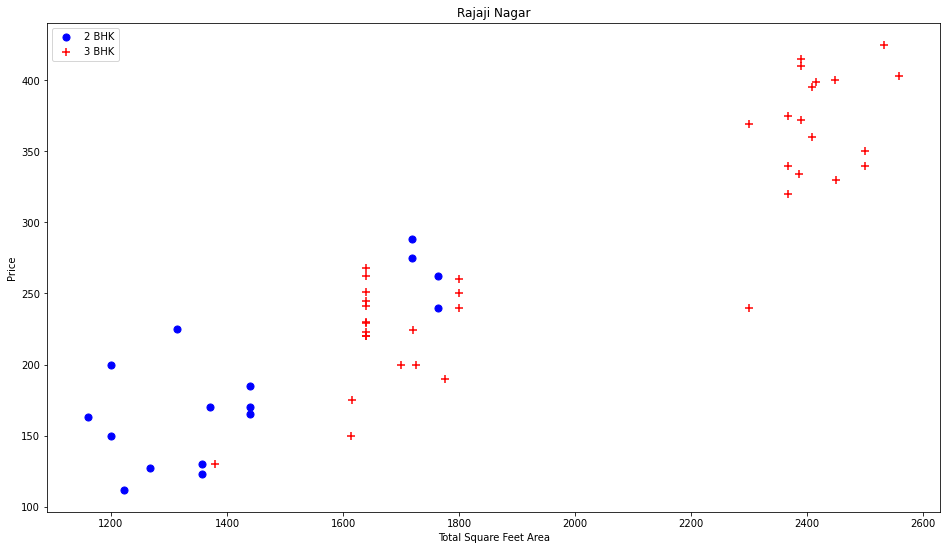

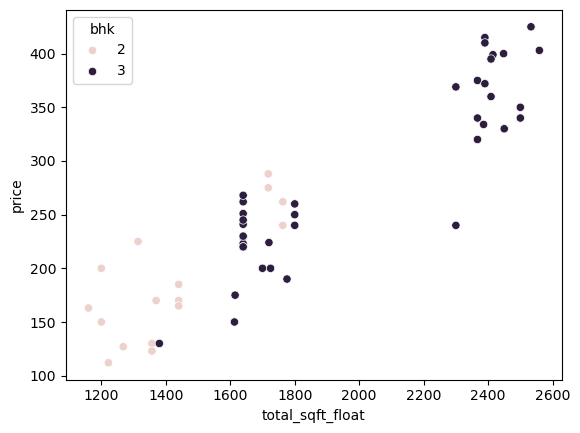

In [98]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  #Viết code ở đây
    bhk_needed = [2, 3]
    df_spec = df[(df['location'] == location)]
    sns.scatterplot(x = 'total_sqft_float', y = 'price', hue = 'bhk', data = df_spec[df_spec['bhk'].isin([2, 3])])

    

plot_scatter_chart(df9, "Rajaji Nagar")

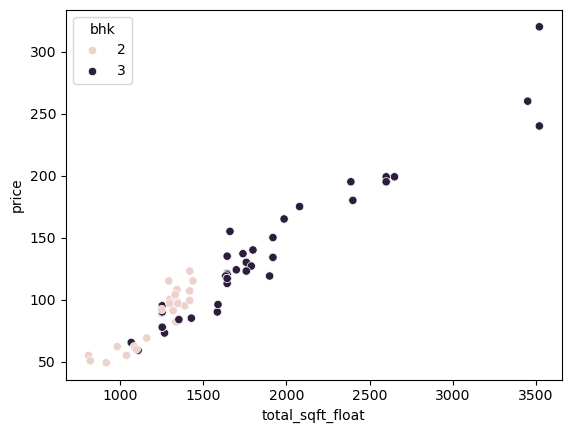

In [99]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

* Thống kê giá nhà theo từng loại khu vực (area_type). Làm với df9:
* xem xét theo từng khu vực, thì giá nhà trung bình (price_per_sqft) là bao nhiêu, tương quan về giá nhà trung bình giữa các khu vực

* Gợi ý: Phần này có thể đưa ra kết quả dạng bảng hoặc biểu đồ (cột, histogram, ...). 
 - Sử dụng các lệnh: df.groupby(), df.sortvalues(), ... để trích xuất giá trị
 - Sử dụng matplotlib: plt.bar(), ...


Text(0, 0.5, 'Money')

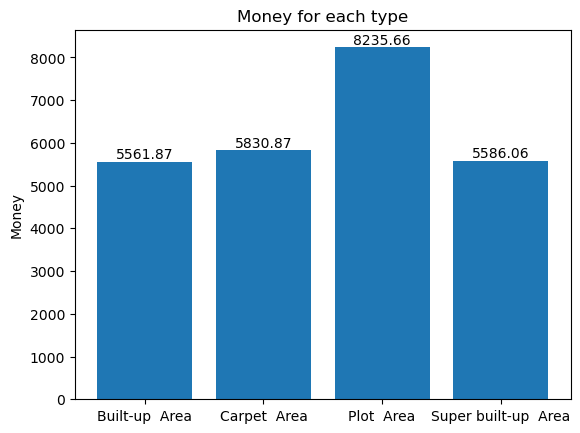

In [100]:
# Code ở đây
types = []
priceTB = []
for key, subdf in df9.groupby('area_type'):
    types.append(key)
    priceTB.append(np.mean(subdf.price_per_sqft))
for i, val in enumerate(priceTB):
    plt.text(i, val + 5, round(val, 2), ha='center', va='bottom', fontsize=10)
plt.bar(types, priceTB)
plt.title("Money for each type")
plt.ylabel('Money')
